In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [59]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('/Users/shiv/Desktop/AI:ML/Iris Dataset/iris.data', header = None, names=column_names)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [60]:
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

y_prediction = knn.predict(X_test)

score = accuracy_score(y_test, y_prediction)
score

1.0

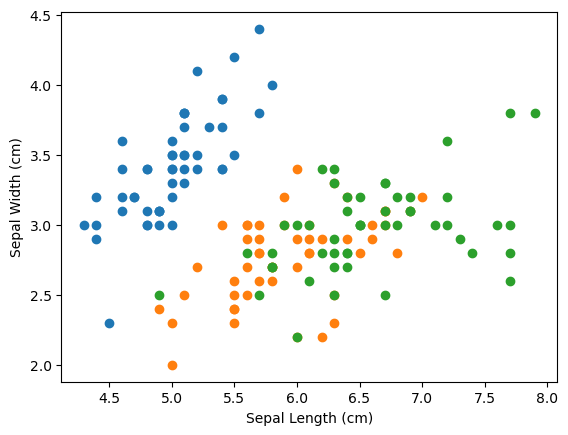

In [62]:
plt.figure()
for species in df["class"].unique():
    sub = df[df["class"] == species]
    plt.scatter(sub["sepal_length"], sub['sepal_width'], label=species)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

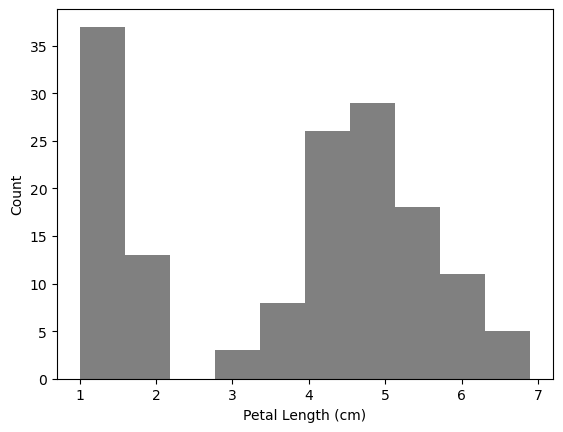

In [63]:
plt.figure()
plt.hist(df["petal_length"], color= "grey")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Count")
plt.show()

/var/folders/v7/zvldjx456912f9cd64thntcr0000gn/T/ipykernel_26924/2808227484.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=cmap_bold(idx), label=class_name)


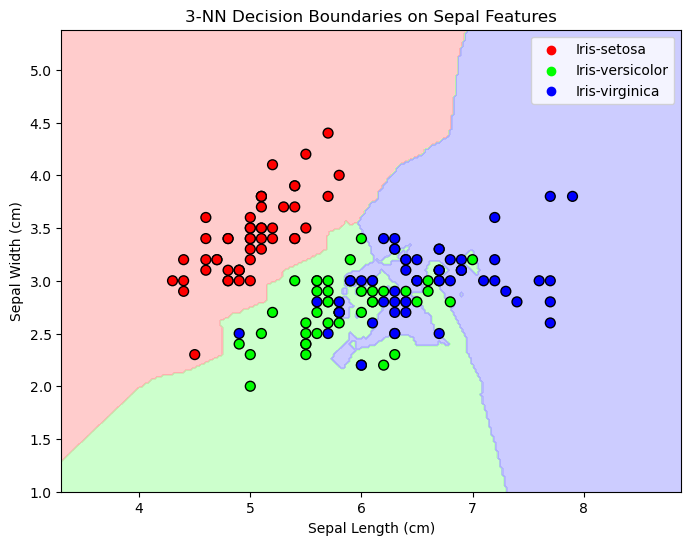

In [66]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
X_vis = df[['sepal_length', 'sepal_width']].values
y_vis = df['class'].values
le = LabelEncoder()
y_num = le.fit_transform(y_vis)
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis, y_num)

x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)


plt.scatter(
    X_vis[:,0], X_vis[:,1],
    c=y_num, cmap=cmap_bold,
    edgecolor='k', s=50
)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('3-NN Decision Boundaries on Sepal Features')
for idx, class_name in enumerate(le.classes_):
    plt.scatter([], [], c=cmap_bold(idx), label=class_name)
plt.legend()
plt.show()